In [9]:
include("solutionFunctions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


# Waves on a Ferrofluid Jet

In [12]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(36,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-10).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-12]


## Compute solution branch
@time solutions = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :NewtonRaphson, 1000);

Branch point 10 of 100
Branch point 20 of 100
Branch point 30 of 100
Branch point 40 of 100
Branch point 50 of 100
Branch point 60 of 100
Branch point 70 of 100
Branch point 80 of 100
Branch point 90 of 100
Branch point 100 of 100
  2.764933 seconds (169.65 M allocations: 6.308 GiB, 24.71% gc time)


In [14]:
## Initialize 

branchN = 1000
a1Vals = collect(range(0.001, 0.33, branchN + 1))

# initialze constants
constants = Constants(48,π,1.5,0.1)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants);

# initial guess 
initial_guess = (1e-15).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-15]


## Compute solution branch
@time solutions = bifurcation(initial_guess, a1Vals, branchN, constants, 1e-8, :NewtonRaphson, 1000);

Branch point 100 of 1000
Branch point 200 of 1000
Branch point 300 of 1000
Branch point 400 of 1000
Branch point 500 of 1000
Branch point 600 of 1000
Branch point 700 of 1000


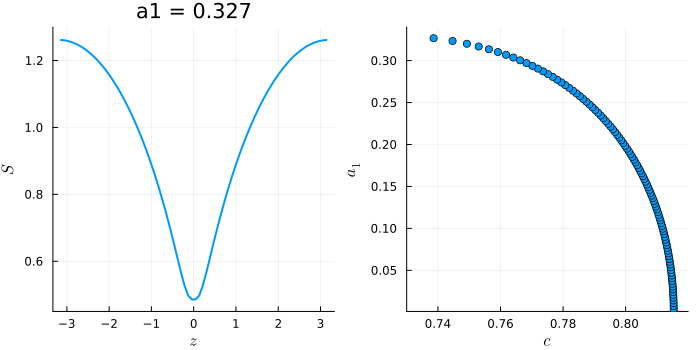

In [22]:
# convert and visualize

solcoeffs = solutions[:,2:end]
solspeeds = solutions[:,1]

# create array for profiles
profiles = zeros(branchN,length(constants.z))

# convert profiles
for i = 1:branchN
    profiles[i,:] .= fourierSeries(solcoeffs[i,:], constants.z, constants.L)[1]
end

# reflect profiles 
solprofiles = [profiles[:,Int(end/2)+1:end] profiles[:,1:Int(end/2)]]; nothing

# plotting
profile_plot, branch_plot, coeff_plot = plotting(solutions, branchN, constants)
	
ylims!(profile_plot, 0.45,1.3)

xlims!(branch_plot, 0.73,0.82)
ylims!(branch_plot, 0.001,0.34)

plot(profile_plot, branch_plot, size=(700,350))